<a href="https://colab.research.google.com/github/angelosou/biblioteca_pandas/blob/main/M%C3%A9tricas_de_empresa_de_varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
    #Custos das ligações feitas
import pandas as pd
import numpy as np

    # Carregar o arquivo CSV com o delimitador correto
file_path = 'Train.csv'  # Certifique-se de que o arquivo esteja no mesmo diretório do seu script
data = pd.read_csv(file_path, delimiter=';')

    # Converter a coluna 'ligacoes_feitas' para numérico, forçando erros para NaN
data['ligacoes_feitas'] = pd.to_numeric(data['ligacoes_feitas'], errors='coerce')

    # Preencher valores NaN com 0 (ou outra estratégia conforme necessário)
data['ligacoes_feitas'].fillna(0, inplace=True)

    # Definir a taxa por minuto e a duração média por ligação
taxa_por_minuto = 0.50
duracao_media_por_ligacao = 5  # em minutos

    # Calcular o custo total das ligações
data['Custo_Ligacao'] = data['ligacoes_feitas'] * duracao_media_por_ligacao * taxa_por_minuto

    # Visualizar as primeiras linhas do DataFrame atualizado
print(data[['ligacoes_feitas', 'Custo_Ligacao']].head())


   ligacoes_feitas  Custo_Ligacao
0              4.0           10.0
1              4.0           10.0
2              2.0            5.0
3              3.0            7.5
4              2.0            5.0


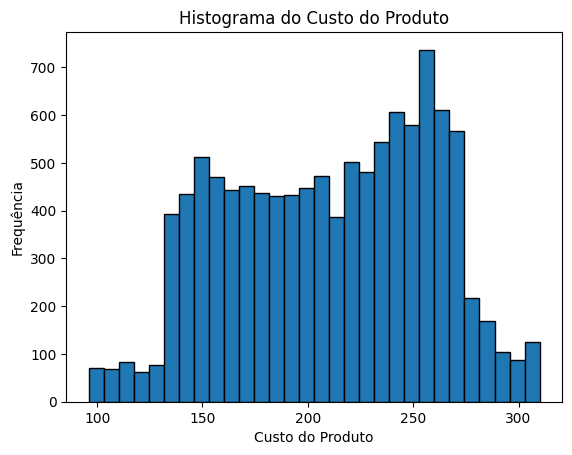

In [31]:
    #Custo dos produto (histograma)
import matplotlib.pyplot as plt

    # Converter a coluna 'custo_produto' para numérico, forçando erros para NaN
data['custo_produto'] = pd.to_numeric(data['custo_produto'], errors='coerce')

    # Preencher valores NaN com 0 (ou outra estratégia conforme necessário)
data['custo_produto'].fillna(0, inplace=True)

    # Plotar o histograma do custo do produto
plt.hist(data['custo_produto'], bins=30, edgecolor='black')
plt.title('Histograma do Custo do Produto')
plt.xlabel('Custo do Produto')
plt.ylabel('Frequência')
plt.show()


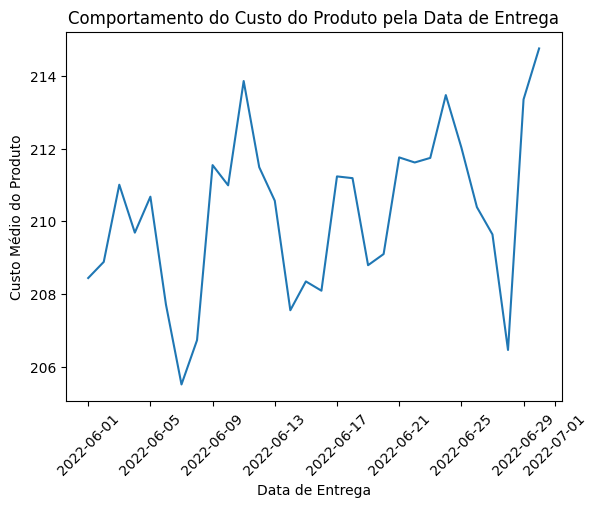

In [32]:
    #Comportamento do custo do produto pela data de entrega
    # Converter a coluna 'data_chegada' para datetime
data['data_chegada'] = pd.to_datetime(data['data_chegada'], format='%d/%m/%Y', errors='coerce')

    # Agrupar por data de chegada e calcular a média do custo do produto
custo_por_data = data.groupby('data_chegada')['custo_produto'].mean().reset_index()

    # Plotar o comportamento do custo do produto pela data de entrega
plt.plot(custo_por_data['data_chegada'], custo_por_data['custo_produto'])
plt.title('Comportamento do Custo do Produto pela Data de Entrega')
plt.xlabel('Data de Entrega')
plt.ylabel('Custo Médio do Produto')
plt.xticks(rotation=45)
plt.show()


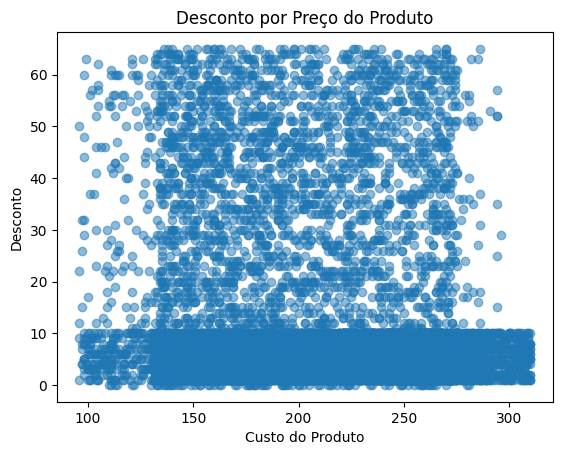

In [33]:
    #Desconto por preço do produto
    # Converter a coluna 'desconto' para numérico, forçando erros para NaN
data['desconto'] = pd.to_numeric(data['desconto'], errors='coerce')

    # Preencher valores NaN com 0 (ou outra estratégia conforme necessário)
data['desconto'].fillna(0, inplace=True)

    # Plotar a relação entre desconto e custo do produto
plt.scatter(data['custo_produto'], data['desconto'], alpha=0.5)
plt.title('Desconto por Preço do Produto')
plt.xlabel('Custo do Produto')
plt.ylabel('Desconto')
plt.show()


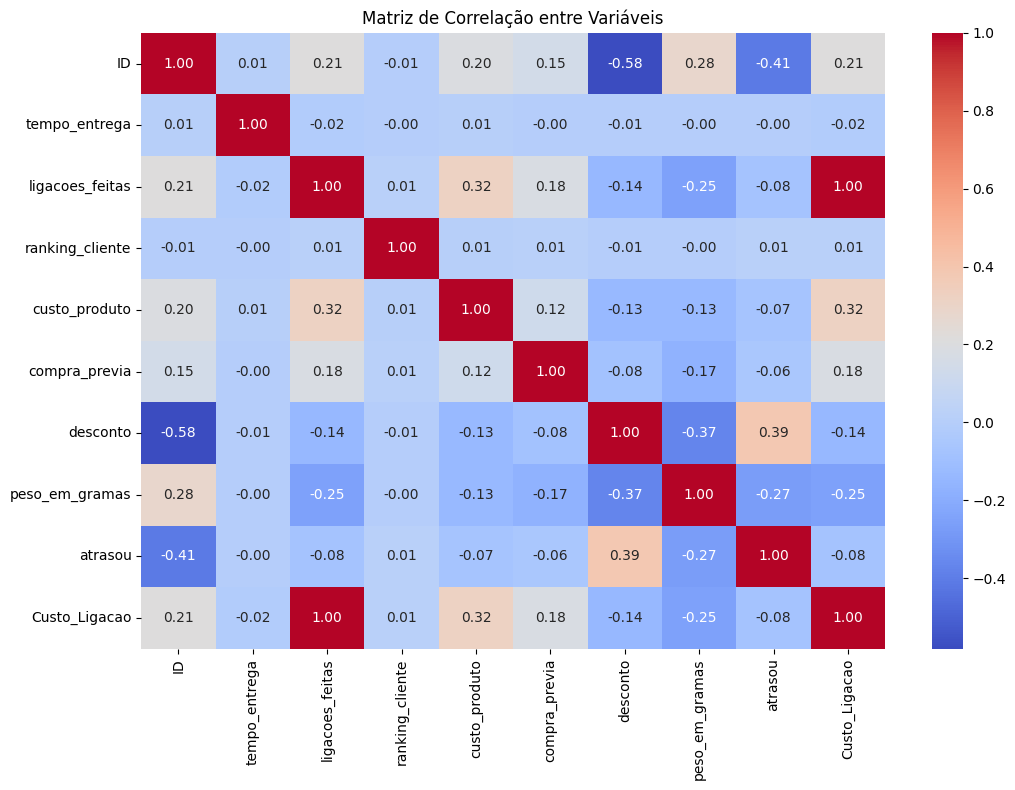

In [35]:
    #Correlações entre variáveis
import seaborn as sns

    # Calcular a correlação entre as variáveis
correlacoes = data.corr(numeric_only=True)

    # Visualizar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()
